<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_SustitucionMediaMediana_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sustitución por la Media/Mediana con Scikit-learn ==> SimpleImputer

En la librería Scikit-learn hay una clase para manejar una gran variedad de métodos de sustitución.

El **SimpleImputer** es una clase que provee funcionalidad básica para la sustitución de valores ausentes, incluyendo:

- Sustitución por la media y la mediana para variables numéricas
- Sustitución por la categoría más frecuente para variables categóricas.
- Sustitución por valores arbitrarios para variables numéricas y categóricas.

### Ventajas

- Fácil de usar si se aplica a todo el dataframe
- Código mantenido por desarrolladores de Scikit-learn: buena calidad
- Rápida computación (usa NumPy para los cálculos)
- Permite usar grid-search (búsqueda en cuadrículas) para varios métodos de sustitución
- Permite usar diferentes valores para codificar ausencia de datos (se puede indicar si por ejemplo los valores nulos son np.nan, ceros, cadenas de caracteres vacías, u otros)

### Limitaciones

- Retorna un arreglo de NumPy en lugar de un dataframe de pandas, lo cual es inconveniente para el análisis de datos
- Necesita usar clases adicionales para seleccionar cuales variables se deben sustituir ==>
    - requiere líneas de código adicional
    - requiere ser usado con otras clases
    - no es tan sencillo de usar
    
### Más detalles acerca de los transformadores (transformers en inglés)

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## En este demo:

Vamos a ver **sustitución media/mediana con Scikit-learn** usando los datos Ames House Price.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahí el nombre dado a la clase.
* 'slicing' significa seleccionar conjuntos de datos (columnas/filas) de un ‘DataFrame’.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# estas son las clases para sustitutición con sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dividir dataset
from sklearn.model_selection import train_test_split

In [4]:
# solo usaremos las siguientes variables en el demo:
# 3 tienen NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# carguemos datos con las columnas seleccionadas

data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [7]:
# evaluemos el porcentaje de valores nulos para cada variable
data.isnull().mean().sort_values(ascending=False)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
SalePrice      0.000000
WoodDeckSF     0.000000
GrLivArea      0.000000
1stFlrSF       0.000000
TotalBsmtSF    0.000000
BsmtUnfSF      0.000000
OverallQual    0.000000
dtype: float64

Las variables LotFrontage, MasVnrArea y GarageYrBlt tienen datos ausentes.

In [8]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables
#Y hacemos un split del set original porque la media y mediana tiene que ser aprendida solo del set de entrenamiento
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # solo las variables
                                                    data['SalePrice'], # el target
                                                    test_size=0.3, # el percentaje de obs en el segmento de prueba
                                                    random_state=0) # para reproducir
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [12]:
# evaluemos el porcentaje de datos ausentes nuevamente
#Los valores faltantes cambiaron un poco debido a que solo estamos trabajando con el 70%
X_train.isnull().mean().sort_values(ascending=False)

LotFrontage    0.184932
GarageYrBlt    0.052838
MasVnrArea     0.004892
BsmtUnfSF      0.000000
WoodDeckSF     0.000000
GrLivArea      0.000000
1stFlrSF       0.000000
TotalBsmtSF    0.000000
OverallQual    0.000000
dtype: float64

### SimpleImputer en el conjunto de datos

In [13]:
# Ahora sustituyamos los valores faltantes con  SimpleImputer

# creemos una instancia de la clase SimpleImputer
# indicaremos que queremos sustituir con la mediana
imputer = SimpleImputer(strategy='median')

# ajustamos 'imputer' al segmento de entrenamiento
# el imputer aprenderá la mediana de cada variable
imputer.fit(X_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

**Nota, si quieres hacer la sustitución por la media en lugar de la mediana, simplemente pasa el argumento 'mean' en 'strategy'**

In [14]:
# podemos ver cual fue la mediana calculada:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [15]:
# y ahora podemos investigar la mediana directamente para corroborar
# que el imputer hizo un buen trabajo
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** el SimpleImputer aprende (calcula) la mediana de TODAS las variables en los datos, tanto las que tienen y las que no tienen valores nulos o NA.

In [16]:
# y ahora sustituimos los valores nulos en los sets de entrenamiento y prueba

# NOTA: los datos retornados son un numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [17]:
# si queremos continuar con nuestro análisis de datos, 
# tenemos que codificar los datos nuevamente en un dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


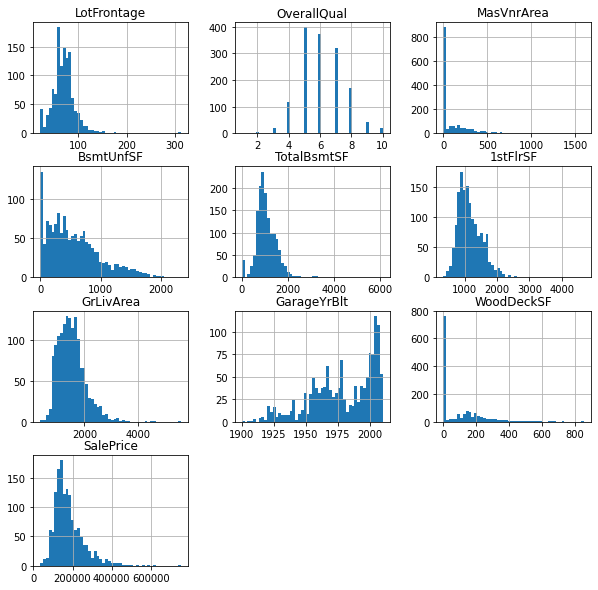

In [19]:
# Exploremos el cambio en las distribuciones después de la sustitución por la mediana
data.hist(bins=50, figsize=(10,10))
plt.show()

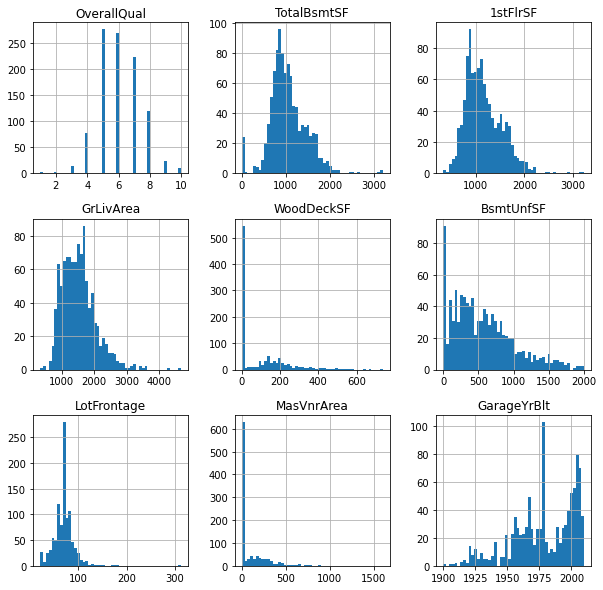

In [18]:
# Exploremos el cambio en las distribuciones después de la sustitución por la mediana
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

La variable LotFrontAge tiene una barra sobresalientemente alta, sobre el valor de la media en el histograma, que aparece luego de la imputación. Esto es un producto de la imputación elegida.

**ADVERTENCIA**: cuando se codifica el numpy array que retorna Scikit-learn de vuelta a un dataframe, existe el riesgo que el orden de las variables se altere y por lo tanto se DISTORSIONEN los datos!!

Necesitas ser extremadamente cuidadoso de pasar las columnas al comando pd.DataFrame en el mismo orden que estaban en X_train ANTES de la transformación!.


### SimpleImputer: diferentes métodos en diferentes variables

En algunas ocasiones, queremos implementar diferentes técnicas de imputación para las diferentes variables. 
Cómo podemos hacer esto usando el SimpleImputer de Scikit-learn?

Tenemos que utilizar otra clase llamada ColumnTransformer. 

Más detalles sobre el ColumnTransformer en [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [20]:
# Separemos en sets para entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [21]:
# % de valores ausentes
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

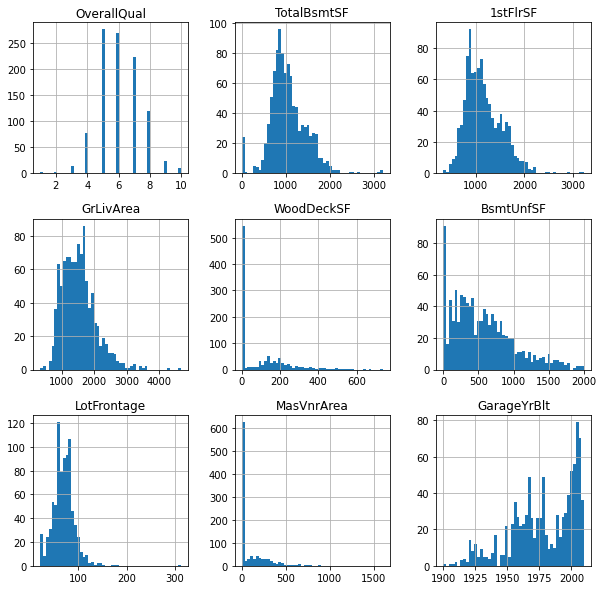

In [22]:
# Exploremos as distribuciones para decidir si es mejor usar
# sustitutición por media o mediana

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Para este demo, vamos a sustituir LotFrontage con la media, y MasVnrArea, GarageYrBlt con la mediana ya que estas variables están un poco sesgadas.

In [23]:
# primero vamos a crear una lista, indicando cuales son las 
# variables a sustituir con cada método

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# luego vamos a instanciar imputers dentro de un pipeline
# creamos un imputer para la media y otro para la mediana
# simplemente intercambiando los parámetros en 'strategy'

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# luego ponemos las variables en una lista junto a los transformadores 
# usando el ColumnTransformer

# necesitamos añadir remainder = True para indicar que queremos
# TODAS las columnas devueltas al final de la transformación
# y no solo las que hemos transformado, que es el comportamiento por
# defecto del ColumnTransformer.

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


# parámetros del ColumnTransformer
# remainder = 'passthrough' indica que queremos retener TODAS las columnas del dataframe
            # de lo contrario solo las especificadas en los pasos de la sustitución se mantendrán
    
# para mas detalles seguir la página de sklearn:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [24]:
# ahora ajustemos el preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [25]:
# exploremos los transformers:
preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [26]:
# podemos ver los parámetros aprendidos:

# para el imputer de la media
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.66866747])

In [27]:
# y podemos corroborar el valor con el obtenido en el set de entrenamiento
X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [28]:
# para el imputer por la mediana hay dos valores aprendidos
# porque queremos sustituir 2 variables diferentes

preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [29]:
# y si corroboramos estos valores en el set de entrenamiento
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [30]:
# y ahora podemos sustituir los datos
X_train = preprocessor.transform(X_train)

# y revisar que funcionó
np.mean(np.isnan(X_train))

0.0

In [31]:
# lo mismo en el set de prueba
X_test = preprocessor.transform(X_test)

# y revisar que funcionó
np.mean(np.isnan(X_test))

0.0

In [32]:
# recuerda que el objeto retornado es un NumPy array
X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [33]:
# si queremos poner el array de vuelta en un dataframe, necesitamos
# ser cuidadosos con el orden de las columnas

# podemos explorar las variables usadas en cada transformador
# incluyendo aquellas que quedaron ('remainder' en inglés) (estas son las que no fueron transformadas)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

el código anterior nos dice cuáles son las columnas que quedaron sin transformar – indica específicamente su posición 0, 1, 2, 3, 4, 5 en X_train

In [34]:
# capturemos las columnas en una lista

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [35]:
# capturemos los datos de vuelta en un dataframe
pd.DataFrame(X_train,
             columns = numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.668667,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.000000,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.000000,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.000000,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


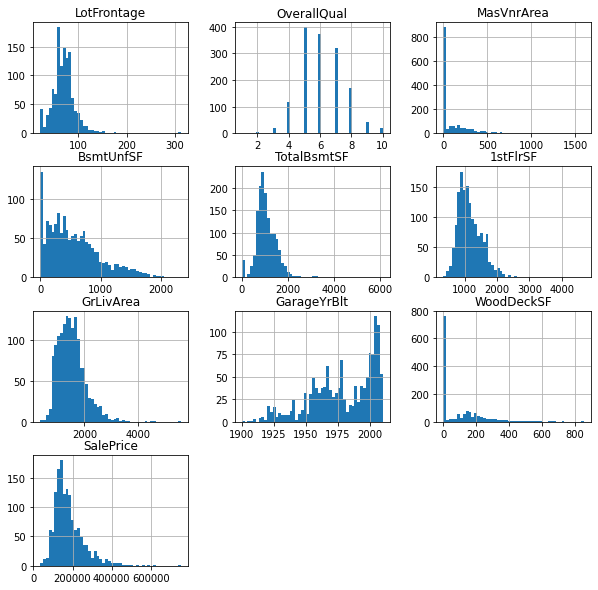

In [36]:
# Exploremos el cambio en las distribuciones después de la sustitución por la mediana
data.hist(bins=50, figsize=(10,10))
plt.show()

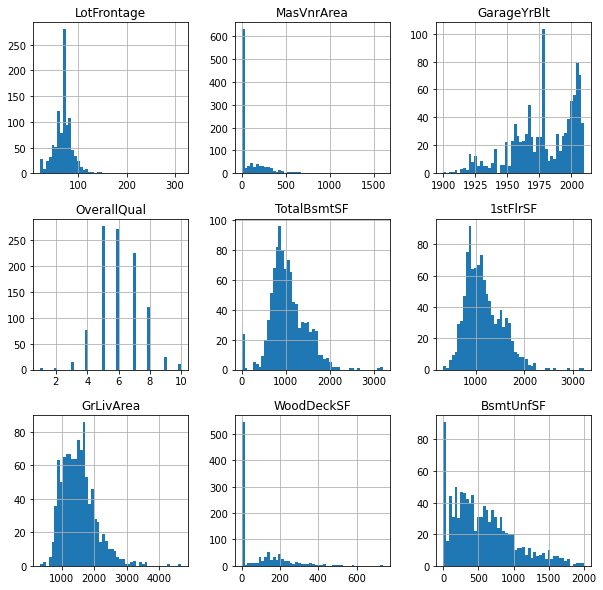

In [37]:
# Exploremos el cambio en las distribuciones después de la sustitución por la mediana
pd.DataFrame(X_train,
             columns = numeric_features_mean+numeric_features_median+remainder_cols).hist(bins=50, figsize=(10,10))
plt.show()

**OTRA ADVERTENCIA**

El ColumnTransformer simplemente selecciona una porción del dataframe que tiene las columnas requeridas para la sustitución. Luego el SimpleImputer opera en este sub-dataframe.
Si diferentes hacemos diferentes sustituciones en diferentes columnas, el ColumnTransformer genera dos dataframes con las columnas requeridas, aplica los imputadores, y luego concatena los dataframes para producir el resultado final.

En nuestro ejemplo, sucede lo siguiente:

- El ColumnTransformer primero crea una columna sola con el primer feature, LotFrontage
- El ColumnTransformer crea un dataframe de dos 2 columnas con las variables MasVnrArea y GarageBlt
- ColumnTransformer crea un dataframe adicional con las variables restantes del set de entrenamiento
- Los diferentes SimpleImputers aprenden los parámetros para cada uno de los dataframes seleccionados
- ColunmnTransformer concatena de vuelta todos los dataframes en el resultado final